## Trump individual contributions

This notebook is for the analysis of individual campaign contributions to Donald Trump. Data came from the Federal Election Commission, but filtered out and cleaned from another notebook.

In [1]:
import pandas as pd
import datetime
import numpy as np
import csv
import time
import re
from plotnine import *
pd.set_option('display.max_columns', None)

In [2]:
trump = pd.read_csv('filtered/trump individual contributions-Jan2024.csv')
trump

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6408/2275406714.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,29605.0,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCDANIEL, DEBRA",KIRKLAND,WA,98034.0,RETIRED,RETIRED,2023-01-01,50.0,C00694323,SA11AI.82677041,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCDANIEL, DEBRA",KIRKLAND,WA,98034.0,RETIRED,RETIRED,2023-01-01,50.0,C00694323,SA11AI.82677042,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"WALTERS, BRIAN",SMITHVILLE,TN,37166.0,DISABLED VETERAN,DISABLED VETERAN,2023-01-01,1.0,C00694323,SA11AI.82674723,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"HARTPENCE, ROBERT",NAMPA,ID,83651.0,RETIRED,RETIRED,2023-01-01,20.0,C00694323,SA11AI.82690808,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00828541,N,YE,P2024,2.024013e+17,15E,IND,"FRITZ, JEFF",YUMA,AZ,85365.0,ALEXANDER AUTO,EXECUTIVE,2023-12-31,104.0,C00694323,SA17A.98895137,1752841.0,NaN,NaN,4.020720e+18
1783715,C00828541,N,YE,P2024,2.024013e+17,15E,IND,"ADAMS, DAVID",ROCKMART,GA,30153.0,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA17A.98894933,1752841.0,NaN,NaN,4.020720e+18
1783716,C00828541,N,YE,P2024,2.024013e+17,15E,IND,"ADAMS, JULIE",SCARBOROUGH,ME,4074.0,1 CALL,SENIOR SERVICES,2023-12-31,21.0,C00694323,SA17A.98894642,1752841.0,NaN,NaN,4.020720e+18
1783717,C00828541,N,YE,P2024,2.024013e+17,15E,IND,"AHERN, PHILIP",FENTON,MO,63026.0,SELF-EMPLOYED,CONSTRUCTION PROJECT MANAGER,2023-12-31,48.0,C00694323,SA17A.98894934,1752841.0,NaN,NaN,4.020720e+18


## Sort according to date of transaction

In [3]:
trump = trump.sort_values('transaction_date').reset_index(drop=True)
trump

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,29605.0,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,71292.0,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,89142.0,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,97623.0,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,16046.0,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,57252.0,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,25430.0,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,76209.0,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,83712.0,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


## Remove memo_code with 'X' and non-individuals

According to FEC guidelines, these donations should "not be included in the itemization total."

In [4]:
trump = trump[trump.memo_code != 'X']
trump

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,29605.0,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,71292.0,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,89142.0,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,97623.0,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,16046.0,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,57252.0,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,25430.0,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,76209.0,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,83712.0,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


In [5]:
trump.entity_type.value_counts()

IND    1783426
CCM         88
PAC         63
ORG          7
COM          1
Name: entity_type, dtype: int64

In [6]:
trump = trump[trump.entity_type == 'IND']
trump

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,29605.0,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,71292.0,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,89142.0,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,97623.0,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,16046.0,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,57252.0,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,25430.0,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,76209.0,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,83712.0,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


## Make into datetime

In [7]:
trump.transaction_date = pd.to_datetime(trump.transaction_date)
trump

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6408/880991434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,29605.0,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,71292.0,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,89142.0,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,97623.0,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,16046.0,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,57252.0,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,25430.0,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,76209.0,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,83712.0,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


## Fix zip code

The zip code format is 12345-1234. We need to put a dash there.

In [8]:
trump.zip = trump.zip.astype(str)
trump

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6408/303765609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,29605.0,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,71292.0,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,89142.0,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,97623.0,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,16046.0,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,57252.0,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,25430.0,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,76209.0,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,83712.0,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


In [9]:
trump.zip = trump.zip.str.replace(r'[.]\d', '', regex=True)
trump

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6408/2580821665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,29605,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,71292,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,89142,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,97623,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,16046,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,57252,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,25430,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,76209,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,83712,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


In [10]:
trump.zip = trump.zip.str.zfill(9)
trump

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_6408/907947704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,000029605,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,000071292,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,000089142,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,000097623,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,000016046,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,000057252,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,000025430,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,000076209,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,000083712,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


## How much individual contributions did Trump get? 

In [11]:
daily_amount = trump.resample('D', on='transaction_date').amount.sum()
daily_amount

transaction_date
2023-01-01    140136.0
2023-01-02    139147.0
2023-01-03     19611.0
2023-01-04    136098.0
2023-01-05    146637.0
                ...   
2023-12-27    276480.0
2023-12-28    268963.0
2023-12-29    258158.0
2023-12-30    194478.0
2023-12-31    667509.0
Freq: D, Name: amount, Length: 365, dtype: float64

<AxesSubplot:xlabel='transaction_date'>

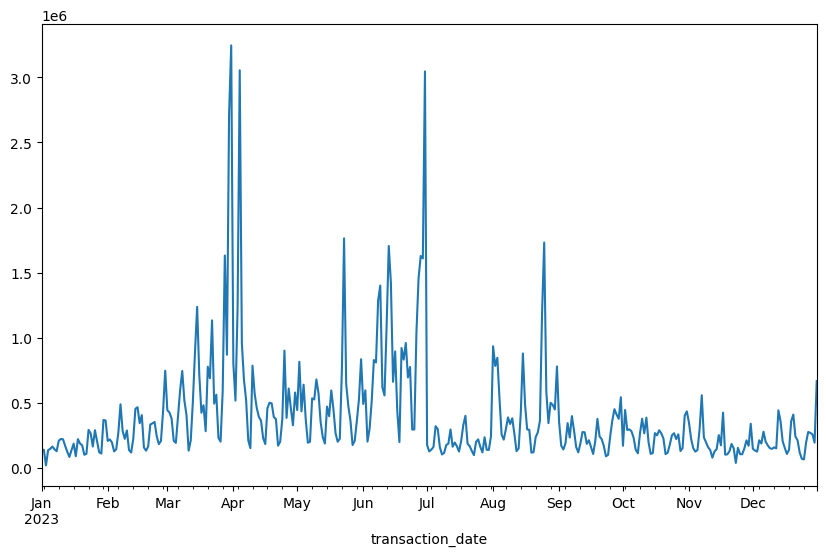

In [12]:
daily_amount.plot(figsize=(10,6))

## How many daily individual donors do Trump get?

Includes donors who donate in multiple days.

In [13]:
daily_donors = trump.groupby(['name', 'state', 'zip', 'transaction_date']).sum().reset_index()
daily_donors

,name,state,zip,transaction_date,image_no,amount,file_num,unique_row_id
0,"A BIANCO, SAL",NJ,079312658,2023-03-14,2.023073e+17,1650.0,1720509.0,4.081720e+18
1,"A BISHOP, NORMAN",IL,605645842,2023-06-05,2.023073e+17,10.0,1720509.0,4.081720e+18
2,"A BURKE, WENDY",WI,532024997,2023-03-18,2.023073e+17,6600.0,1720509.0,4.081720e+18
3,"A BURKE, WENDY",WI,532024997,2023-05-20,2.023073e+17,2500.0,1720509.0,4.081720e+18
4,"A BURKE, WENDY",WI,532024997,2023-05-25,2.023073e+17,3300.0,1720509.0,4.081720e+18
...,...,...,...,...,...,...,...,...
1298653,"ZYWICKI, EDWARD",MI,000048314,2023-08-16,2.024013e+17,47.0,1752820.0,4.020620e+18
1298654,"ZYWICKI, EDWARD",MI,000048314,2023-09-24,2.024013e+17,5.0,1752820.0,4.020620e+18
1298655,"ZYWICKI, EDWARD",MI,000048314,2023-09-30,2.024013e+17,0.0,1752820.0,4.020620e+18
1298656,"ZYWICKI, EDWARD",MI,000048314,2023-10-09,2.024013e+17,0.0,1752820.0,4.020620e+18


In [14]:
donor_count = daily_donors.transaction_date.value_counts().to_frame().reset_index()
donor_count

,index,transaction_date
0,2023-08-25,15204
1,2023-08-24,13767
2,2023-04-04,12580
3,2023-08-03,12219
4,2023-03-31,11628
...,...,...
360,2023-02-02,1180
361,2023-02-19,1156
362,2023-01-26,1153
363,2023-01-25,1149


In [15]:
donor_count = donor_count.sort_values('index').reset_index(drop=True)
donor_count

,index,transaction_date
0,2023-01-01,1621
1,2023-01-02,1453
2,2023-01-03,1550
3,2023-01-04,1724
4,2023-01-05,1774
...,...,...
360,2023-12-27,4239
361,2023-12-28,5269
362,2023-12-29,4602
363,2023-12-30,4494


<AxesSubplot:xlabel='date'>

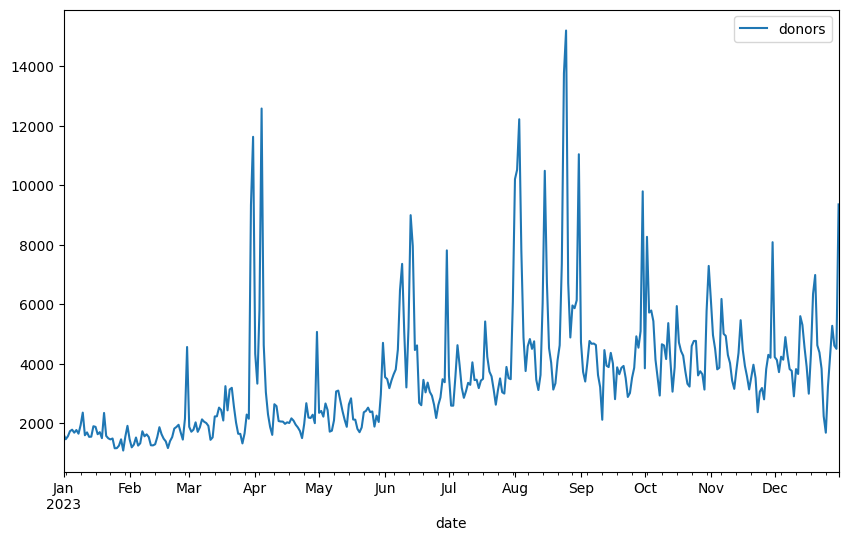

In [16]:
donor_count.columns= ['date', 'donors']
donor_count.plot(x='date', y='donors', figsize=(10,6))

## How many unique individual donors for Trump?

In [17]:
trump

,filer_id,amendment_id,report_type,election_code,image_no,transaction_type,entity_type,name,city,state,zip,employer,occupation,transaction_date,amount,other_id,transaction_id,file_num,memo_code,memo_text,unique_row_id
0,C00770941,N,MY,P,2.023073e+17,15E,IND,"MCLAIN, RODNEY",GREENVILLE,SC,000029605,RETIRED,RETIRED,2023-01-01,15.0,C00694323,SA11AI.82674234,1720241.0,NaN,NaN,4.080120e+18
1,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARKS, NANCY",WEST MONROE,LA,000071292,RETIRED,RETIRED,2023-01-01,25.0,C00694323,SA11AI.82686108,1720241.0,NaN,NaN,4.080120e+18
2,C00770941,N,MY,P,2.023073e+17,15E,IND,"PARRA, DEBRA",LAS VEGAS,NV,000089142,RETIRED,RETIRED,2023-01-01,18.0,C00694323,SA11AI.82688146,1720241.0,NaN,NaN,4.080120e+18
3,C00770941,N,MY,P,2.023073e+17,15E,IND,"MYER, MICHAEL",BONANZA,OR,000097623,RETIRED,RETIRED,2023-01-01,250.0,C00694323,SA11AI.82682966,1720241.0,NaN,NaN,4.080120e+18
4,C00770941,N,MY,P,2.023073e+17,15E,IND,"MUSULIN, MARK",SEVEN FIELDS,PA,000016046,NOT EMPLOYED,NOT EMPLOYED,2023-01-01,104.0,C00694323,SA11AI.82684878,1720241.0,NaN,NaN,4.080120e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783714,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRIETZEL, MARILYN",MILBANK,SD,000057252,RETIRED,RETIRED,2023-12-31,0.0,C00694323,SA11AI.98929146,1752820.0,NaN,NaN,4.020620e+18
1783715,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRINE, PATCHES",KEARNEYSVILLE,WV,000025430,M-BC PARKS RECREATION,RECEPTIONIST,2023-12-31,24.0,C00694323,SA11AI.98922255,1752820.0,NaN,NaN,4.020620e+18
1783716,C00770941,N,YE,P,2.024013e+17,15E,IND,"STRITTMATTER, AVA",DENTON,TX,000076209,RETIRED,RETIRED,2023-12-31,48.0,C00694323,SA11AI.98931557,1752820.0,NaN,NaN,4.020620e+18
1783717,C00770941,N,YE,P,2.024013e+17,15E,IND,"STROMBERG, MARC",BOISE,ID,000083712,PACIFIC STATES,ENGINEER,2023-12-31,5.0,C00694323,SA11AI.98929111,1752820.0,NaN,NaN,4.020620e+18


In [21]:
unique_donors = trump.groupby(['name', 'state', 'zip']).nunique().count()
unique_donors

filer_id            182317
amendment_id        182317
report_type         182317
election_code       182317
image_no            182317
transaction_type    182317
entity_type         182317
city                182317
employer            182317
occupation          182317
transaction_date    182317
amount              182317
other_id            182317
transaction_id      182317
file_num            182317
memo_code           182317
memo_text           182317
unique_row_id       182317
dtype: int64

### Trump had 182,317 unique individual donors across different committees and WinRed for entire 2023.